In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


# Titanic Dataset Analysis

This project is both a way to **test my knowledge in Python** and to **refresh my university learning**.  
It’s meant to be challenging, but also fun, since I enjoy applying theory to real datasets.  

The Titanic dataset is perfect for practicing because it combines **statistics, data cleaning, and modeling**.  

---

## Hypothesis & Biases

Based on my own understanding of the disaster (and my biases), I expect the following:  

- **Class (SES)**, **Age**, and **Gender** were the biggest factors in survival.  
- People with **higher socio-economic status** (SES) likely had higher survival rates.  
- **Women and children** were prioritized during rescue.  

This project will help me test and confirm (or reject) these assumptions.  

---

## Historical Context

- The Titanic disaster occurred in **1912**.  
- Social norms at the time placed high value on **women and children first**.  
- This context is important when interpreting survival patterns.  

---

## Research Questions

Here are the questions I want to explore in this analysis:

1. Who were the **oldest** passengers?  
2. Who were the **youngest** passengers?  
3. Does the **port of embarkation** reflect socio-economic status (SES)?  
4. Did **women with children** have a higher chance of survival?  
5. What **ages of men** were more likely to survive?  



In [2]:
# Loading the main file of information of passengers onboard
df = pd.read_csv('test.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# information thats important to make the analysis 
df_survival = pd.read_csv('gender_submission.csv')
df_survival

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
# we merged the two datasets to make it easier to analyze
df_merge = pd.merge(df,df_survival, on=['PassengerId'], how='left')
df_merge

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


The oldest was 76.0, and the youngest was 0.17


Text(0, 0.5, 'Embarkment')

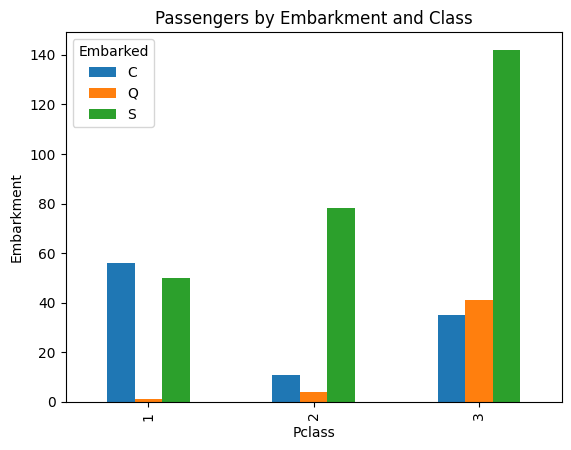

In [5]:
# 1. Who were the oldest passengers?  
# 2. Who were the youngest passengers?  

max_age = max(df_merge['Age'])
min_age = min(df_merge['Age'])

print(f"The oldest was {max_age}, and the youngest was {min_age}")

# 3. Does the port of embarkation reflect socio-economic status (SES)?  
counts = df_merge.groupby(['Pclass', 'Embarked']).size()
counts = counts.unstack(fill_value=0)
counts.plot(kind='bar')

# Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
plt.title("Passengers by Embarkment and Class")
plt.ylabel("Embarkment")

# An another interstring question, how much is the fare for each class (scatter plot)



{'whiskers': [<matplotlib.lines.Line2D at 0x775ef92f67e0>,
 'caps': [<matplotlib.lines.Line2D at 0x775ef92f6a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x775ef92f7b90>,
 'medians': [<matplotlib.lines.Line2D at 0x775ef92f6330>,
 'fliers': [<matplotlib.lines.Line2D at 0x775ef92f5d90>,
 'means': []}

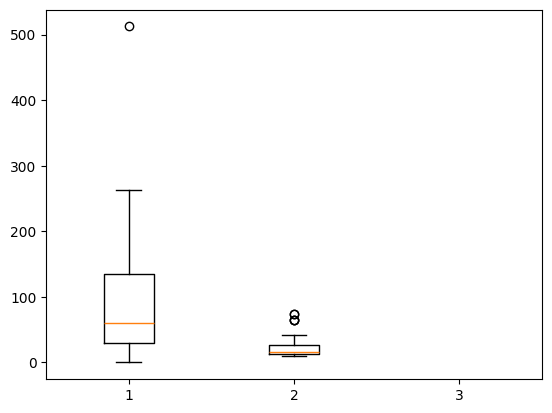

In [8]:
fare_class1 = df_merge[df_merge['Pclass']==1]['Fare']
fare_class2 = df_merge[df_merge['Pclass']==2]['Fare']
fare_class3 = df_merge[df_merge['Pclass']==3]['Fare']

plt.boxplot([fare_class1, fare_class2, fare_class3], label = ["Class 1", "Class 2", "Class 3"])